Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [1]:
#all the imports I needed
import numpy as np
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


One Sample: the measured sample comes from a proposed distribution.


Two Samples: two measured samples come from the same unspecified distribution.

**NOTE**: For these tests the 'aim' of the experiment isn't to reject the null hypothesis but to fail to reject it.

    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


One Sample: $d_{1}=\max_x |C_1(x) - C(x)|$

Two Sample: $d_{1,2}=\max_x|C_1(x)-C_2(x)|$

where $C_{\{1,2\}}(x)$ are the cumulative probability distribution of a measured dataset, and $C(x)$ is a proposed distribution (predecided).


    3 What does the probability distribution of this statistic depend on?
    
   


Two Sample: $P(d>D)=2\sum_{j=1}^\infty (-1)^{j+1}e^{-2j^2x^2}\sqrt{\frac{N_1N_2}{N_1+N_2}D}$

where $D$ is the observed pivotal quantity and $d$ is the 'true' pivotal quantity.
    

# PART I:  Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [2]:
eqdata = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/earthquakes.csv', sep=r'\s+')


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [3]:
#note: the number of columns may be different depending on how you read the data in. The number of ROWs MUST be the same
eqdata.shape #also note: in class we used a different name for the dataframe
# eqdata = eqdata.sample(1000)

(70798, 13)

In [4]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,19:38:19.79,eq,l,2.13,c,33.963,-116.290,2.7,C,28553,40,49


In [5]:
eqdata.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,70798.000000,70798.000000,70798.00000,70798.000000,7.079800e+04,70798.000000,70798.000000
mean,2.417826,33.977749,-116.88145,5.707677,3.699163e+06,30.424376,175.725049
std,0.407683,1.156586,1.07667,3.842620,3.495378e+06,22.374143,226.196774
min,2.000000,30.094830,-121.76000,0.000000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.061000,-117.69200,3.100000,7.380962e+05,15.000000,59.000000
50%,2.300000,34.056750,-116.59000,5.300000,3.049477e+06,24.000000,111.000000
75%,2.590000,34.591000,-116.25100,6.900000,3.325926e+06,39.000000,211.000000
max,7.100000,37.985500,-113.71900,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [6]:
# your code here...
eqdata_full = eqdata.rename({"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "MAG":"mag" }, axis=1)
eqdata = eqdata_full[['date', 'time', 'mag']].copy()

In [7]:
eqdata.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [8]:
eqdata.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [9]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [10]:

eqdata['datetime_string'] = eqdata['date'] + ' ' + eqdata['time']
def hack_datetime_string(datetime_string):
    if datetime_string.endswith('60.00'):
        return datetime_string[:-5] + '59.99'
    else:
        return datetime_string
eqdata['datetime_string_hack'] = eqdata['datetime_string'].map(hack_datetime_string)
eqdata['datetime'] = eqdata['datetime_string_hack'].map(pd.to_datetime)
eqdata.head()

,date,time,mag,datetime_string,datetime_string_hack,datetime
0,1984/01/01,01:30:57.52,2.02,1984/01/01 01:30:57.52,1984/01/01 01:30:57.52,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984/01/01 05:31:34.16,1984/01/01 05:31:34.16,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984/01/01 06:59:05.14,1984/01/01 06:59:05.14,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984/01/01 11:10:25.29,1984/01/01 11:10:25.29,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984/01/01 19:38:19.79,1984/01/01 19:38:19.79,1984-01-01 19:38:19.790


## select valuable data
Starting here is stuff we did not do together in class but is part of the homework due on 9/17


Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [11]:
stationary_years = np.array([
    1984, 1986.5,
    1990.3, 1992.1,
    1994.6, 1995.6,
    1996.1, 1996.5,
    1997, 1997.6,
    1997.75, 1998.15,
    1998.25, 1999.35,
    2000.55, 2000.8,
    2000.9, 2001.25, 
    2001.6, 2002,
    2002.5, 2003,
]) # needs to be 1d for vectorized pd.to_timedelta
# Got it down to a one-liner (aside from the stationary_years array obviously)
stationary_datetimes = np.array(pd.Timestamp('1980-01-01') + pd.to_timedelta((stationary_years-1980)*365.25, unit='D')).reshape(-1, 2)
# canonical rename
ss = stationary_datetimes

In [12]:
print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))
ss

the 11 timestamp pairs that are the boundaries of good data periods are:


array([['1984-01-01T00:00:00.000000000', '1986-07-02T03:00:00.000000000'],
       ['1990-04-20T01:47:59.999998565', '1992-02-06T12:35:59.999997140'],
       ['1994-08-07T15:35:59.999997140', '1995-08-07T21:35:59.999997140'],
       ['1996-02-06T12:35:59.999997140', '1996-07-01T15:00:00.000000000'],
       ['1996-12-31T06:00:00.000000000', '1997-08-07T09:35:59.999997140'],
       ['1997-10-01T04:30:00.000000000', '1998-02-24T06:54:00.000002859'],
       ['1998-04-01T19:30:00.000000000', '1999-05-08T14:05:59.999997140'],
       ['2000-07-19T21:17:59.999998565', '2000-10-19T04:47:59.999998565'],
       ['2000-11-24T17:24:00.000002859', '2001-04-01T13:30:00.000000000'],
       ['2001-08-07T09:35:59.999997140', '2001-12-31T12:00:00.000000000'],
       ['2002-07-02T03:00:00.000000000', '2002-12-31T18:00:00.000000000']],
      dtype='datetime64[ns]')

The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [13]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [14]:
# your code here: broadcasting to create a dataframe with the good dates only

# Conditional
def is_outside_stationary_periods(datetime):
    for start, end in stationary_datetimes:
        if start <= datetime and datetime <= end:
           return True
    return False

# Broadcase conditional
eqGoodData = eqdata[eqdata['datetime'].apply(is_outside_stationary_periods)]

# Drop all but datetime and mag
eqGoodData = eqGoodData[['datetime','mag']]

In [15]:
eqGoodData.shape

(18869, 2)

In [16]:
eqGoodData.head()

,datetime,mag
0,1984-01-01 01:30:57.520,2.02
1,1984-01-01 05:31:34.160,2.12
2,1984-01-01 06:59:05.140,2.43
3,1984-01-01 11:10:25.290,2.07
4,1984-01-01 19:38:19.790,2.13


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [17]:
# your code here
eqGoodData = eqGoodData[eqGoodData['mag'] >= 2]

In [18]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the datao

(18869, 2)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (as done in class).


In [19]:
eqGoodData.head()

,datetime,mag
0,1984-01-01 01:30:57.520,2.02
1,1984-01-01 05:31:34.160,2.12
2,1984-01-01 06:59:05.140,2.43
3,1984-01-01 11:10:25.290,2.07
4,1984-01-01 19:38:19.790,2.13


In [20]:
#your code here
eqGoodDataDiff = eqGoodData.diff()

In [21]:
eqGoodDataDiff.shape

(18869, 2)

In [22]:
eqGoodDataDiff.head()

,datetime,mag
0,NaT,NaN
1,0 days 04:00:36.640000,0.10
2,0 days 01:27:30.980000,0.31
3,0 days 04:11:20.150000,-0.36
4,0 days 08:27:54.500000,0.06


In [23]:
eqGoodDataDiff.describe()

,datetime,mag
count,18868,18868.000000
mean,0 days 08:49:34.585131969,0.000002
std,12 days 18:29:15.349178862,0.536401
min,0 days 00:00:00.170000,-3.120000
25%,0 days 00:45:36.382500,-0.270000
50%,0 days 02:28:50.935000,0.000000
75%,0 days 05:55:06.490000,0.270000
max,1388 days 02:02:28.580000,3.510000


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [24]:
# your code here
eqGoodDataDiff = eqGoodDataDiff[1:]

In [25]:
eqGoodDataDiff.head()

,datetime,mag
1,0 days 04:00:36.640000,0.10
2,0 days 01:27:30.980000,0.31
3,0 days 04:11:20.150000,-0.36
4,0 days 08:27:54.500000,0.06
5,0 days 00:00:59.880000,0.00


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0, 0.5, 'number')

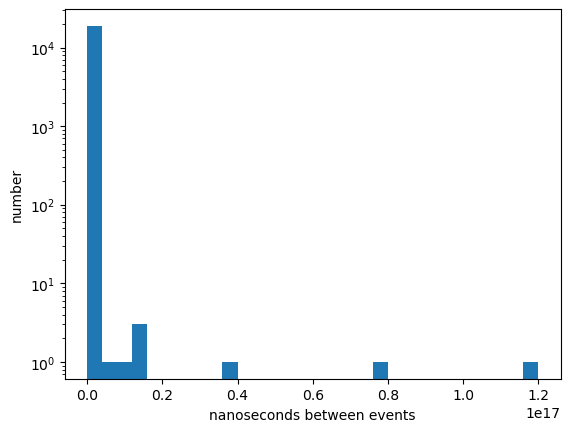

In [26]:
eqGoodDataDiff['datetime_int64'] = eqGoodDataDiff['datetime'].astype('int64')
eqGoodDataDiff['datetime_int64'].plot(kind='hist', logy=True, bins=30)
plt.xlabel('nanoseconds between events')
plt.ylabel('number')

Caption: The logy-histogram of the nanoseconds between earthquake events with 30 bins. The most striking feature is the number of events occuring below 5e15 nanoseconds. This feature means the vast majority of the data is located in a single histogram bin. As a result, the distribution doesn't appear to have any scaling law.

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

Text(0, 0.5, 'number')

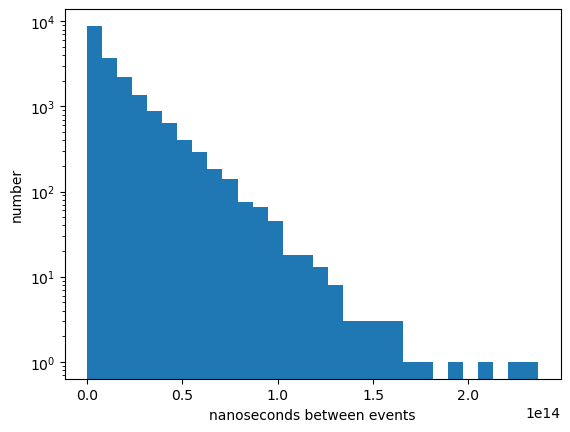

In [27]:
# your code here
eqGoodDataDiff = eqGoodDataDiff[eqGoodDataDiff['datetime'] < pd.to_timedelta(30, unit='D')]
eqGoodDataDiff['datetime_int64'].plot(kind='hist', logy=True, bins=30)
plt.xlabel('nanoseconds between events')
plt.ylabel('number')

Caption: A logy-histogram of nanoseconds between earthquakes events with 30 bins, but with periods of longer than a month removed. This corrected histogram shows a much smoother scaling law. There are a couple of sparse data points beyond 1e14 nanoseconds, but less than that scaling law looks nearly perfect.

# PART II - data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

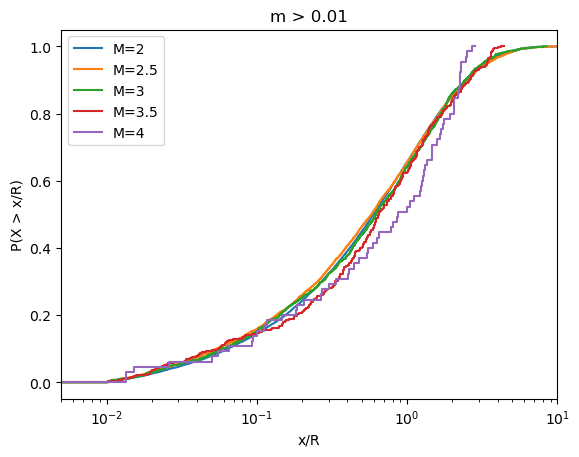

In [28]:
# your code here
alpha = 0.27 #this is in percent
eqGoodDataSamples01 = []

for thresh in [2.0, 2.5, 3.0, 3.5, 4.0]:
    eqfiltered = eqGoodData[eqGoodData['mag'] >= thresh].copy()
    eqfiltered = eqfiltered.diff()
    eqfiltered = eqfiltered[1:]

    eqfiltered = eqfiltered[eqfiltered['datetime'] < pd.to_timedelta(30, unit='D')]
    
    R = 1/np.average(eqfiltered['datetime'].astype('int64'))
    eqfiltered['datetime_normed'] = eqfiltered['datetime'].astype('int64') * R
    eqfiltered = eqfiltered[eqfiltered['datetime_normed'] >= 0.01]

    R = 1/np.average(eqfiltered['datetime'].astype('int64'))
    eqfiltered['datetime_normed'] = eqfiltered['datetime'].astype('int64') * R
    eqfiltered = eqfiltered[eqfiltered['datetime_normed'] >= 0.01]

    eq_edcf = stats.ecdf(eqfiltered['datetime_normed'])
    eq_edcf.cdf.plot()

    eqGoodDataSamples01.append(eqfiltered.copy())


plt.xscale('log')
plt.xlim([0.005,10])
plt.title('m > 0.01')
plt.ylabel('P(X > x/R)')
plt.xlabel('x/R')
plt.legend(['M=2', 'M=2.5', 'M=3', 'M=3.5', 'M=4'])


Caption: A logx plot of several sample's cumulative distribution functions. Each sample was filtered to only include events with magnitude greater than their respective values. Furthermore, the smallest 0.01% of interearthquake times were dropped (iterated twice).This plot looks quite similar to Figure 1 in Correll et al. Specifically, the M=4 line shares the same qualitative shape where it initially undershoots the other samples then overtakes them at around x/R = 2.5 

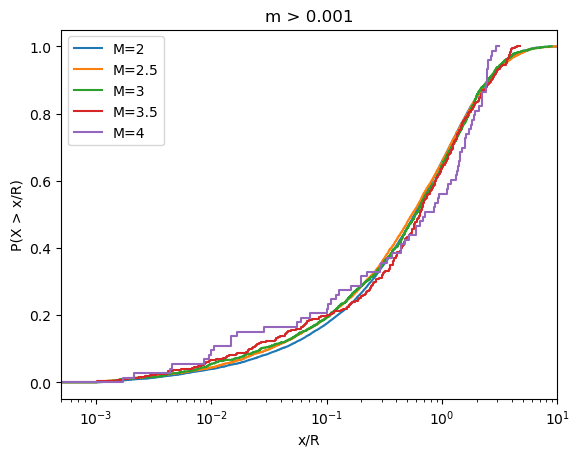

In [29]:
eqGoodDataSamples001 = []
for thresh in [2.0, 2.5, 3.0, 3.5, 4.0]:
    eqfiltered = eqGoodData[eqGoodData['mag'] >= thresh].copy()
    eqfiltered = eqfiltered.diff()
    eqfiltered = eqfiltered[1:]

    eqfiltered = eqfiltered[eqfiltered['datetime'] < pd.to_timedelta(30, unit='D')]
    
    R = 1/np.average(eqfiltered['datetime'].astype('int64'))
    eqfiltered['datetime_normed'] = eqfiltered['datetime'].astype('int64') * R
    eqfiltered = eqfiltered[eqfiltered['datetime_normed'] >= 0.001]

    R = 1/np.average(eqfiltered['datetime'].astype('int64'))
    eqfiltered['datetime_normed'] = eqfiltered['datetime'].astype('int64') * R
    eqfiltered = eqfiltered[eqfiltered['datetime_normed'] >= 0.001]
    
    eq_edcf = stats.ecdf(eqfiltered['datetime_normed'])
    eq_edcf.cdf.plot()

    eqGoodDataSamples001.append(eqfiltered)
    del eqfiltered

plt.xscale('log')
plt.xlim([0.0005,10])
plt.title('m > 0.001')
plt.ylabel('P(X > x/R)')
plt.xlabel('x/R')
plt.legend(['M=2', 'M=2.5', 'M=3', 'M=3.5', 'M=4'])

Caption: A logx plot of several sample's cumulative distribution functions. Each sample was filtered to only include events with magnitude greater than their respective values. Furthermore, the smallest 0.001% of interearthquake times were dropped (iterated twice). This plot expectedly follows a similar shape to the previous but with an extended tail to the left. This has makes the logistic-style increase smoother.

In [30]:
results01 = np.full([5,5], np.nan)
sample_size01 = np.full([5], np.nan)
for i in range(5):
    sample_size01[i] = len(eqGoodDataSamples01[i])
    for j in range(i + 1, 5):
        ks_statistic, p_value = stats.ks_2samp(eqGoodDataSamples01[i]['datetime_normed'], eqGoodDataSamples01[j]['datetime_normed'])
        results01[i, j] = p_value * 100
        results01[j, i] = ks_statistic
table01 = np.concatenate([sample_size01.reshape([5,1]), results01], axis=1)

results001 = np.full([5,5], np.nan)
sample_size001 = np.full([5], np.nan)
for i in range(5):
    sample_size001[i] = len(eqGoodDataSamples001[i])
    for j in range(i+1, 5):
        ks_statistic, p_value = stats.ks_2samp(eqGoodDataSamples001[i]['datetime_normed'], eqGoodDataSamples001[j]['datetime_normed'])
        results001[i, j] = p_value * 100
        results001[j, i] = ks_statistic
table001 = np.concatenate([sample_size001.reshape([5,1]), results001], axis=1)

In [31]:
# My actual markdown table is in the next cell
with np.printoptions(precision=2, suppress=True, floatmode='fixed'):
    print('m=0.01')
    print('   N         2.0       2.5       3.0      3.5     4.0')
    print('-----------------------------------------------------')
    print(table01)
    print('m=0.001')
    print('   N         2.0       2.5       3.0      3.5     4.0')
    print('-----------------------------------------------------')
    print(table001)

m=0.01
   N         2.0       2.5       3.0      3.5     4.0
-----------------------------------------------------
[[17968.00      nan     6.26    54.60    24.03     5.71]
 [ 5370.00     0.02      nan    21.77     6.67     6.51]
 [ 1327.00     0.02     0.03      nan    45.72    13.08]
 [  362.00     0.05     0.07     0.05      nan    16.06]
 [   65.00     0.16     0.16     0.15     0.15      nan]]
m=0.001
   N         2.0       2.5       3.0      3.5     4.0
-----------------------------------------------------
[[18728.00      nan     2.16    27.43    41.84    11.11]
 [ 5627.00     0.02      nan    37.84    16.36    12.82]
 [ 1406.00     0.03     0.03      nan    60.18    24.39]
 [  388.00     0.04     0.06     0.04      nan    29.68]
 [   73.00     0.14     0.14     0.12     0.12      nan]]


$m=0.01$   |N      |$M\ge2.0$|$M\ge2.5$|$M\ge3.0$|$M\ge3.5$|$M\ge4.0$|
-----------|-------|---------|---------|---------|---------|---------|
$M \ge 2.0$|$17968$|-        |6.26%    |54.60%   |24.03%   |5.71%    |
$M \ge 2.5$|$5370$ |0.02     |-        |21.77%   |6.67%    |6.51%    |
$M \ge 3.0$|$1327$ |0.02     |0.03     |-        |45.72%   |13.08%   |
$M \ge 3.5$|$362$  |0.05     |0.07     |0.05     |-        |16.06%   |
$M \ge 4.0$|$65$   |0.16     |0.16     |0.15     |0.15     |-        |


$m=0.001$  |N      |$M\ge2.0$|$M\ge2.5$|$M\ge3.0$|$M\ge3.5$|$M\ge4.0$|
-----------|-------|---------|---------|---------|---------|---------|
$M \ge 2.0$|$18728$|-        |2.16%    |27.60%   |41.84%   |11.11%   |
$M \ge 2.5$|$5627$ |0.02     |-        |37.84%   |16.36%   |12.82%   |
$M \ge 3.0$|$1406$ |0.03     |0.03     |-        |60.18%   |24.39%   |
$M \ge 3.5$|$388$  |0.04     |0.06     |0.04     |-        |29.68%   |
$M \ge 4.0$|$73$   |0.14     |0.14     |0.12     |0.12     |-        |

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

My results fail to reject the null hypothesis as all my p-values were greater than the specified alpha of 0.27%. However, my statistical results were much weaker than Correll's with p-values as low as 2.16%. The p-value in this context means that there is 2.16% chance that if both the $M\ge2.0$ and $M\ge2.5$ were drawn from the same distribution, then the the ks pivotal quantitiy between the two would be greater to or equal to what was observed.

My results and Correll's most likely differ because of the slightly different datasets each of us used. This can be seen in the sample size column of our tables which differ by around 5% in size.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

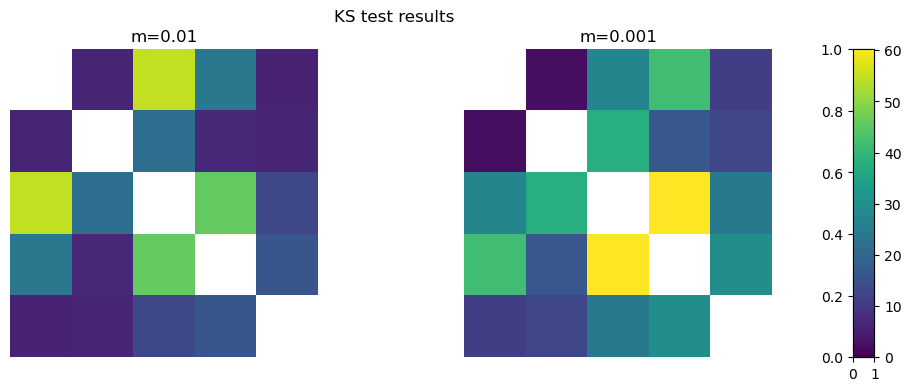

In [32]:
# your code here
def table2ks(table):
    ks = table[:,1:]
    for i in range(5):
        for j in range(i + 1, 5):
            ks[j,i] = ks[i, j]
    return ks 

ks_001 = table2ks(table01)
ks_0001 = table2ks(table001)
ks_min = 0
ks_max = np.nanmax([ks_001, ks_0001])

# Create figure with GridSpec
# I used claude ai to help me here with remembering how to properly initialize a set of subplots
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.05)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
cbar_ax = fig.add_subplot(gs[0, 2])

im1 = ax1.imshow(ks_001, vmin=ks_min, vmax=ks_max);
ax1.set_title('m=0.01')
ax1.axis('off')
im2 = ax2.imshow(ks_0001, vmin=ks_min, vmax=ks_max);
ax2.set_title('m=0.001')
ax2.axis('off')


cbar_ax = fig.add_subplot(gs[0, 2])
fig.colorbar(im1, cax=cbar_ax)
fig.suptitle("KS test results");

Caption: A visualization of the p values of the two different sample combinations. The diagonal which don't correspond to anything is left white. The m=0.01 plot shows much greater variance than the m=0.001 which is somewhat expected as it has less data.


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

In [33]:
def is_significant(ks_001, ks_0001, alpha):
    statsig_001 = ks_001 < alpha
    statsig_0001 = ks_0001 < alpha
    result = statsig_001.any() or statsig_0001.any()
    print(f'For alpha={alpha:.2f}%, it is {result} that theres any statistically significant results')
    return result
is_significant(ks_001, ks_0001, alpha)



For alpha=0.27%, it is False that theres any statistically significant results


np.False_

In [34]:
i = 0
while ~is_significant(ks_001, ks_0001, i):
    i += 0.01


For alpha=0.00%, it is False that theres any statistically significant results
For alpha=0.01%, it is False that theres any statistically significant results
For alpha=0.02%, it is False that theres any statistically significant results
For alpha=0.03%, it is False that theres any statistically significant results
For alpha=0.04%, it is False that theres any statistically significant results
For alpha=0.05%, it is False that theres any statistically significant results
For alpha=0.06%, it is False that theres any statistically significant results
For alpha=0.07%, it is False that theres any statistically significant results
For alpha=0.08%, it is False that theres any statistically significant results
For alpha=0.09%, it is False that theres any statistically significant results
For alpha=0.10%, it is False that theres any statistically significant results
For alpha=0.11%, it is False that theres any statistically significant results
For alpha=0.12%, it is False that theres any statist

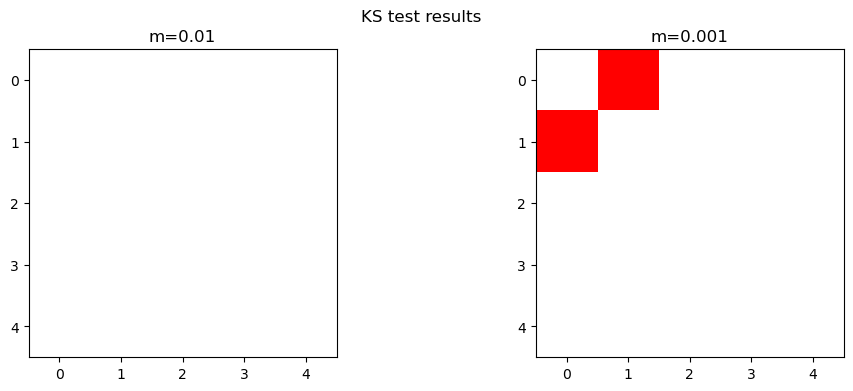

In [35]:
# Setting alpha to a new round number greater than the found
alpha = 2.5 # in percent

statsig001 = ks_001 < alpha
rgbmap001 = np.zeros((*statsig001.shape, 3))
rgbmap001[statsig001] = [1,0,0]
rgbmap001[~statsig001] = [1,1,1]
statsig0001 = ks_0001 <= alpha
rgbmap0001 = np.zeros((*statsig001.shape, 3))
rgbmap0001[statsig0001] = [1,0,0]
rgbmap0001[~statsig0001] = [1,1,1]



fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

im1 = ax1.imshow(rgbmap001);
ax1.set_title('m=0.01')
im2 = ax2.imshow(rgbmap0001);
ax2.set_title('m=0.001')

# cbar_ax = fig.add_subplot(gs[0, 2])
# fig.colorbar(im1, cax=cbar_ax)
fig.suptitle("KS test results");

Caption: A plot of where the elements of a grid are colored based on whether or not the elements of the p-value matrix are below the alpha value. By increasing the alpha value to 2.5%, I was able to get a statistically significant result for the M>2.0 sample and M>2.5 sample. Therefore, this new alpha would find that the null hypothesis is rejected which is evidense that the two come from different distributions.

You're not allowed to change the alpha threshold once data is collected because this would allow you to post hoc devise an appropriate alpha to obtain the desired result. This is obviously unethical as it injects a conflict of interest into the process.

Redoing it for threshold 0001